# Haberman's Survival Dataset

Dataset:['https://www.kaggle.com/gilsousa/habermans-survival-data-set']
* Simple dataset contains patient records who had undergone surgery for breast cancer.
* Objective: Label new patients belonging to one of the 2 classes-Survived or Dead


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

habers=pd.read_csv('haberman.csv')

In [2]:
#(Q) What are the column names?
#(Q) How many data points and features?
habers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                   306 non-null int64
year_of_op            306 non-null int64
detected_pos_nodes    306 non-null int64
status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


* Datapoints:306
* Features:4
* Shape:(306,4)

In [3]:
habers.shape

(306, 4)

In [4]:
habers['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

* Dataset is imbalenced
* Staus(feature)
   * 1=Survived
   * 2=Dead

### 3D Scatterplot

### Pair-Plot

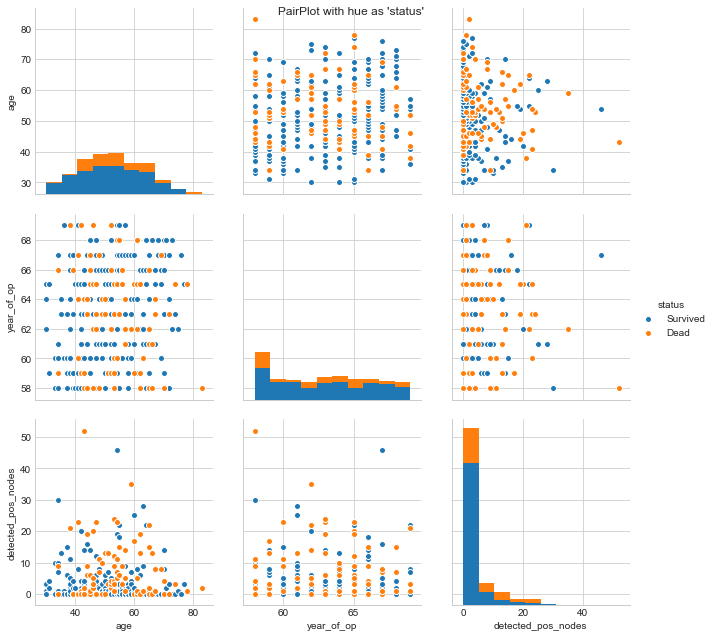

In [5]:
habers["status"] = habers["status"].apply(lambda y: "Survived" if y == 1 else "Dead")
survived=habers.loc[habers['status'] == 'Survived']
dead=habers.loc[habers['status'] == 'Dead']

sns.set_style('whitegrid')
sns.pairplot(habers,hue='status',size=3)
plt.suptitle("PairPlot with hue as 'status'")
plt.show()

###### Update: 
* Removed Status Variable
* 3*3 Grid

##### Observation:
Not much can be concluded from the pair-plot as we are not able to distinguish between classes. However, Auxilary Nodes(detected_pos_nodes) plot is showing some classification

### 1-D Scatter Plot

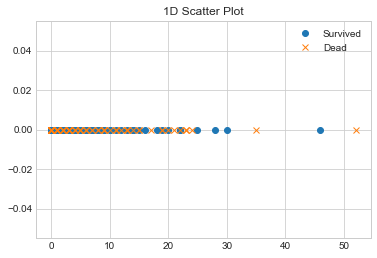

In [6]:
ax=plt.plot(survived['detected_pos_nodes'], np.zeros_like(survived['detected_pos_nodes']),'o',label='Survived')
ax1=plt.plot(dead['detected_pos_nodes'], np.zeros_like(dead['detected_pos_nodes']),'x',label='Dead')
plt.title('1D Scatter Plot')
plt.legend()
plt.show()

###### Update:
* Added Legend
* Added Title

##### Observation:
Many overlaps between class atribute and hence cannot be seperated

### Describe

In [7]:
survived.describe()

,age,year_of_op,detected_pos_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [8]:
dead.describe()

,age,year_of_op,detected_pos_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Histogram, PDF, CDF

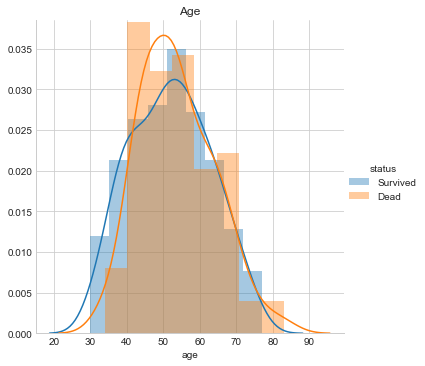

In [9]:
sns.FacetGrid(habers, hue='status', size=5) \
    .map(sns.distplot, 'age') \
    .add_legend()
plt.title('Age')
plt.show()

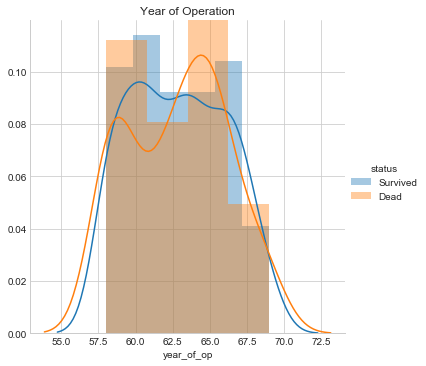

In [10]:
sns.FacetGrid(habers, hue='status', size=5) \
    .map(sns.distplot, 'year_of_op') \
    .add_legend()
plt.title('Year of Operation')
plt.show()

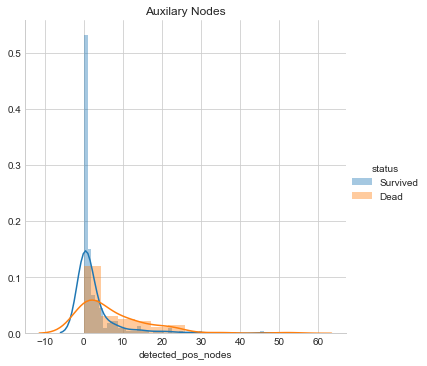

In [11]:
sns.FacetGrid(habers, hue='status', size=5) \
    .map(sns.distplot, 'detected_pos_nodes') \
    .add_legend()
plt.title('Auxilary Nodes')
plt.show()

###### Update:
* Added Title to all Histograms

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


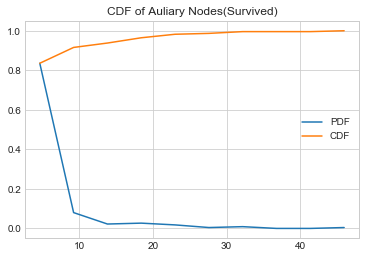

In [12]:
#CDF of Auxilary nodes
#Survived

counts, bin_edges = np.histogram(survived['detected_pos_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend()
plt.title('CDF of Auliary Nodes(Survived)')



plt.show();

##### Observation:
* Most patients who survived had Auxilary nodes < 10(~90%)

[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]


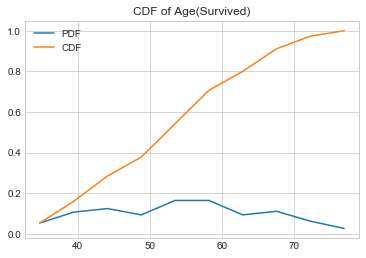

In [13]:
#CDF of Age
#Survived
counts, bin_edges = np.histogram(survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend()
plt.title('CDF of Age(Survived)')



plt.show();

[ 0.18666667  0.10666667  0.10222222  0.07111111  0.09777778  0.10222222
  0.06666667  0.09777778  0.09333333  0.07555556]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


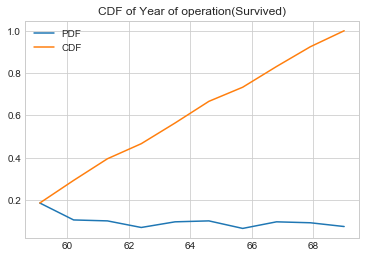

In [14]:
#CDF of Year of Operation
#Survived

counts, bin_edges = np.histogram(survived['year_of_op'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend()
plt.title('CDF of Year of operation(Survived)')



plt.show();

[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


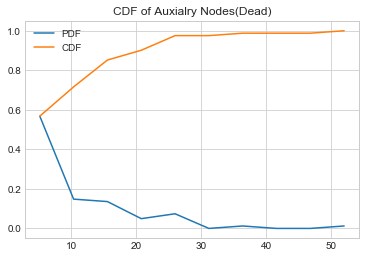

In [15]:
#CDF of Auxilary Nodes
#Dead

counts, bin_edges = np.histogram(dead['detected_pos_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend()
plt.title('CDF of Auxialry Nodes(Dead)')



plt.show();

##### Observation:
Most Patients having Auxilar Nodes > 27 Died(~98%)

[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


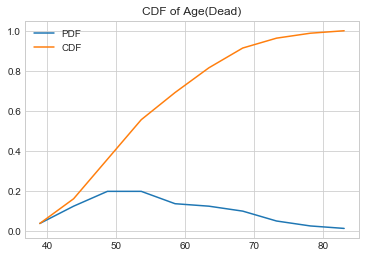

In [16]:
#CDF of Age
#Dead

counts, bin_edges = np.histogram(dead['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend()
plt.title('CDF of Age(Dead)')



plt.show();

[ 0.25925926  0.04938272  0.03703704  0.08641975  0.09876543  0.09876543
  0.16049383  0.07407407  0.04938272  0.08641975]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


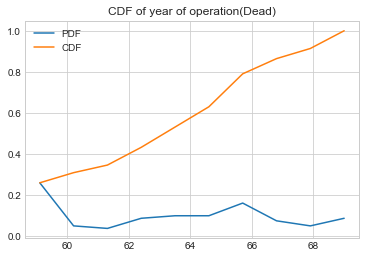

In [17]:
#CDF of Year of Operation
#Dead

counts, bin_edges = np.histogram(dead['year_of_op'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend()
plt.title('CDF of year of operation(Dead)')



plt.show();

##### Update:
* Added Legend
* Added Title

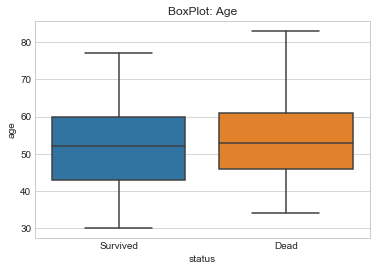

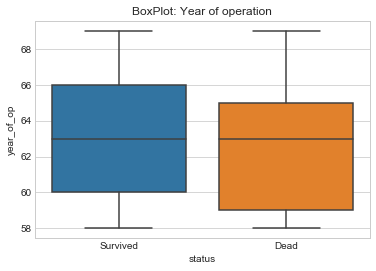

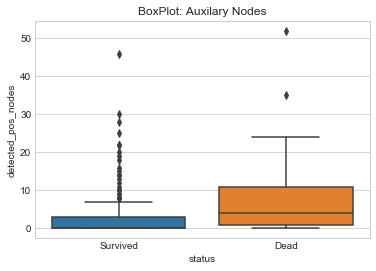

In [18]:
sns.boxplot(x='status',y='age', data=habers)
plt.title('BoxPlot: Age')
plt.show()
sns.boxplot(x='status',y='year_of_op', data=habers)
plt.title('BoxPlot: Year of operation')
plt.show()
sns.boxplot(x='status',y='detected_pos_nodes', data=habers)
plt.title('BoxPlot: Auxilary Nodes')
plt.show()

###### Observations:
* Those who were operated after 1965 have higher chances of survival.
* Those having Auxilary Node > 3 have greater chances of dying.
* Those in the age group 30-35 are more likely to survive.
* Those in age group 76-83 are most likely to die.

### Conclusion:
* ##### Survival
    * Auxilary Nodes < 3 can survive.(Aux Node < 10=~90% Survival Rate)
    * Auxilar Nodes < 3 and operated after 1965 have greater chances of survival.
    * Patients having Auxilar nodes < 3, treated after 1965 and in age group 30-35 will difinately survive.
* ##### Dead
    * Patients having Auxilary Nodes > 3 are likely to die(Aux Nodes > 10=~99% Death Rate).
    * Auxilary Nodes > 3 and treated before 1965 are more likely to die.
    * Patients having Auxilar node > 3, treated before 1965 and in age group 76-83 will difinately die.
    